In [46]:
pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import sklearn.metrics
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [48]:
data20 = pd.read_csv("Models20-22/2020seasonDataforModels")
data21 = pd.read_csv("Models20-22/2021seasonDataforModels")
data22 = pd.read_csv("Models20-22/2022seasonDataforModels")

In [49]:
data20 = data20.drop(["SEASON", "Unnamed: 0"], axis = 1)
data21 = data21.drop(["SEASON", "Unnamed: 0"], axis = 1)
data22 = data22.drop(["SEASON", "Unnamed: 0"], axis = 1)

In [50]:
data20.describe()

,HOME_LAST_3_GAME_AVG_OE,HOME_LAST_3_GAME_AVG_HOME_WIN_PCTG,HOME_NUM_REST_DAYS,HOME_LAST_3_GAME_AVG_AWAY_WIN_PCTG,HOME_LAST_3_GAME_AVG_TOTAL_WIN_PCTG,HOME_LAST_3_GAME_AVG_ROLLING_SCORING_MARGIN,HOME_LAST_3_GAME_AVG_ROLLING_OE,HOME_W,HOME_LAST_3_GAME_AVG_FG_PCT,HOME_LAST_3_GAME_AVG_FG3_PCT,...,AWAY_LAST_3_GAME_AVG_FG_PCT,AWAY_LAST_3_GAME_AVG_FG3_PCT,AWAY_LAST_3_GAME_AVG_FT_PCT,AWAY_LAST_3_GAME_ROLLING_OE,AWAY_LAST_3_GAME_AVG_TOT_REB,AWAY_LAST_3_GAME_AVG_AST,AWAY_LAST_3_GAME_AVG_STL,AWAY_LAST_3_GAME_AVG_TOTAL_TURNOVERS,AWAY_LAST_3_GAME_AVG_BLK,AWAY_LAST_3_GAME_AVG_PTS
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,0.561569,0.527536,2.036963,0.474148,0.500176,2.963703e-02,0.561610,0.548452,0.466310,0.365861,...,0.467674,0.366172,0.780311,0.561971,51.883117,24.850483,7.630370,13.845155,4.823510,112.057276
std,0.033990,0.176031,0.976541,0.172570,0.140097,8.460042e+00,0.029661,0.497896,0.034553,0.051651,...,0.033289,0.048729,0.064337,0.028528,4.430850,3.210116,1.797811,2.501977,1.459581,8.131465
min,0.429059,0.000000,1.000000,0.000000,0.000000,-2.966667e+01,0.463800,0.000000,0.368667,0.198667,...,0.367667,0.193667,0.530000,0.439407,38.333333,15.333333,3.000000,7.000000,1.333333,89.000000
25%,0.541248,0.400000,2.000000,0.366458,0.410589,-5.666667e+00,0.539837,0.000000,0.442000,0.332667,...,0.445333,0.335333,0.737667,0.542835,49.000000,22.666667,6.333333,12.000000,3.666667,106.333333
50%,0.562347,0.523810,2.000000,0.470588,0.499629,1.480297e-16,0.562842,1.000000,0.466333,0.366000,...,0.468667,0.367000,0.784000,0.562425,52.000000,25.000000,7.666667,13.666667,4.666667,112.000000
75%,0.583145,0.634343,2.000000,0.589382,0.592765,5.777778e+00,0.582157,1.000000,0.488667,0.401000,...,0.491000,0.400667,0.827667,0.580956,54.666667,27.000000,8.666667,15.333333,5.666667,117.666667
max,0.653327,1.000000,9.000000,1.000000,1.000000,2.577778e+01,0.642333,1.000000,0.575667,0.523667,...,0.569667,0.518667,0.947333,0.638358,64.333333,35.333333,14.000000,22.000000,10.000000,139.666667


In [51]:
x20 = data20.drop(["HOME_W"], axis=1)
y20 = data20["HOME_W"]
x21 = data21.drop(["HOME_W"], axis=1)
y21 = data21["HOME_W"]
x22 = data22.drop(["HOME_W"], axis=1)
y22 = data22["HOME_W"]

In [52]:
scaler = StandardScaler()
x20 = pd.DataFrame(scaler.fit_transform(x20.values), columns=x20.columns, index=x20.index)
x21 = pd.DataFrame(scaler.fit_transform(x21.values), columns=x21.columns, index=x21.index)
x22 = pd.DataFrame(scaler.fit_transform(x22.values), columns=x22.columns, index=x22.index)

In [53]:
x_train20, x_test20, y_train20, y_test20 = train_test_split(x20, y20, test_size=0.2, random_state=55)
x_train21, x_test21, y_train21, y_test21 = train_test_split(x21, y21, test_size=0.2, random_state=55)
x_train22, x_test22, y_train22, y_test22 = train_test_split(x22, y22, test_size=0.2, random_state=55)

In [54]:
lr20 = LogisticRegression()
lr21 = LogisticRegression()
lr22 = LogisticRegression()

In [55]:
lr20.fit(x_train20, y_train20)
lr21.fit(x_train21, y_train21)
lr22.fit(x_train22, y_train22)

LogisticRegression()

In [56]:
pred20 = lr20.predict(x_test20)
pred20_proba = lr20.predict_proba(x_test20)
pred21 = lr21.predict(x_test21)
pred21_proba = lr21.predict_proba(x_test21)
pred22 = lr22.predict(x_test22)
pred22_proba = lr22.predict_proba(x_test22)

In [57]:
confusion_matrix_20 = sklearn.metrics.confusion_matrix(y_test20, pred20)
print("Confusion Matrix for 2020 Season: ")
print(confusion_matrix_20)
accuracy_20 = sklearn.metrics.accuracy_score(y_test20, pred20)
print("Accuracy for 2020 Season: ", end="")
print(accuracy_20)
recall_20 = sklearn.metrics.recall_score(y_test20, pred20)
print("Recall for 2020 Season: ", end="")
print(recall_20)
specificity_20 = sklearn.metrics.recall_score(y_test20, pred20, pos_label=0)
print("Specificity for 2020 Season: ", end="")
print(specificity_20)
precision_20 = sklearn.metrics.precision_score(y_test20, pred20)
print("Precision for 2020 Season: ", end="")
print(precision_20)
f1_20 = sklearn.metrics.f1_score(y_test20, pred20)
print("F1 for 2020 Season: ", end="")
print(f1_20)

Confusion Matrix for 2020 Season: 
[[43 48]
 [37 73]]
Accuracy for 2020 Season: 0.5771144278606966
Recall for 2020 Season: 0.6636363636363637
Specificity for 2020 Season: 0.4725274725274725
Precision for 2020 Season: 0.6033057851239669
F1 for 2020 Season: 0.6320346320346321


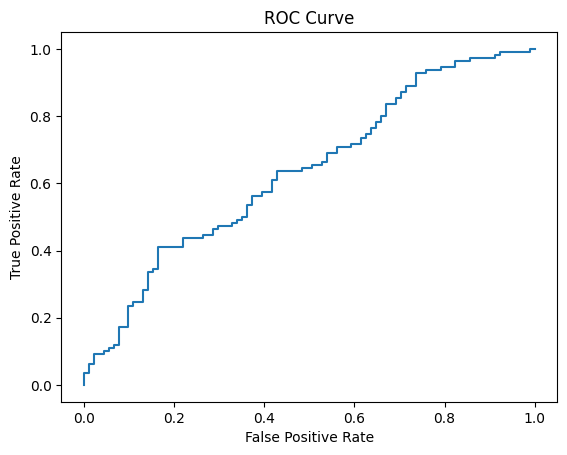

In [58]:
fpr20, tpr20, thresholds20 = roc_curve(y_test20, pred20_proba[:, 1])
plt.plot(fpr20, tpr20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [59]:
confusion_matrix_21 = sklearn.metrics.confusion_matrix(y_test21, pred21)
print("Confusion Matrix for 2021 Season: ")
print(confusion_matrix_21)
accuracy_21 = sklearn.metrics.accuracy_score(y_test21, pred21)
print("Accuracy for 2021 Season: ", end="")
print(accuracy_21)
recall_21 = sklearn.metrics.recall_score(y_test21, pred21)
print("Recall for 2021 Season: ", end="")
print(recall_21)
specificity_21 = sklearn.metrics.recall_score(y_test21, pred21, pos_label=0)
print("Specificity for 2021 Season: ", end="")
print(specificity_21)
precision_21 = sklearn.metrics.precision_score(y_test21, pred21)
print("Precision for 2020 Season: ", end="")
print(precision_21)
f1_21 = sklearn.metrics.f1_score(y_test21, pred21)
print("F1 for 2021 Season: ", end="")
print(f1_21)

Confusion Matrix for 2021 Season: 
[[62 47]
 [42 81]]
Accuracy for 2021 Season: 0.6163793103448276
Recall for 2021 Season: 0.6585365853658537
Specificity for 2021 Season: 0.5688073394495413
Precision for 2020 Season: 0.6328125
F1 for 2021 Season: 0.6454183266932271


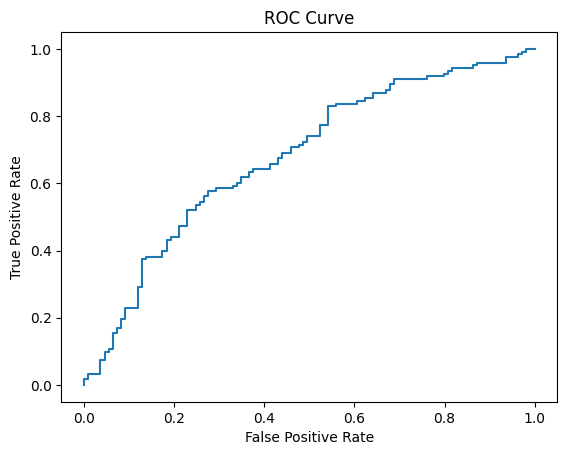

In [60]:
fpr21, tpr21, thresholds21 = roc_curve(y_test21, pred21_proba[:, 1])
plt.plot(fpr21, tpr21)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [61]:
confusion_matrix_22 = sklearn.metrics.confusion_matrix(y_test22, pred22)
print("Confusion Matrix for 2022 Season: ")
print(confusion_matrix_22)
accuracy_22 = sklearn.metrics.accuracy_score(y_test22, pred22)
print("Accuracy for 2022 Season: ", end="")
print(accuracy_22)
recall_22 = sklearn.metrics.recall_score(y_test22, pred22)
print("Recall for 2022 Season: ", end="")
print(recall_22)
specificity_22 = sklearn.metrics.recall_score(y_test22, pred22, pos_label=0)
print("Specificity for 2022 Season: ", end="")
print(specificity_22)
precision_22 = sklearn.metrics.precision_score(y_test22, pred22)
print("Precision for 2022 Season: ", end="")
print(precision_22)
f1_22 = sklearn.metrics.f1_score(y_test22, pred22)
print("F1 for 2022 Season: ", end="")
print(f1_22)

Confusion Matrix for 2022 Season: 
[[ 40  59]
 [ 29 103]]
Accuracy for 2022 Season: 0.6190476190476191
Recall for 2022 Season: 0.7803030303030303
Specificity for 2022 Season: 0.40404040404040403
Precision for 2022 Season: 0.6358024691358025
F1 for 2022 Season: 0.7006802721088435


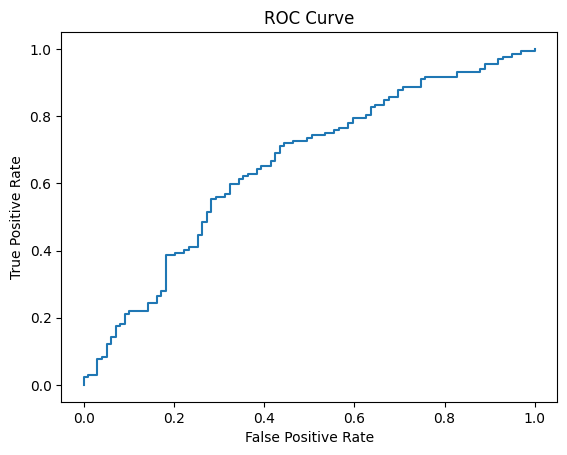

In [62]:
fpr22, tpr22, thresholds22 = roc_curve(y_test22, pred22_proba[:, 1])
plt.plot(fpr22, tpr22)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()